# Introduction to Radar Wind Profiler (RWP) 'LAP3000'
by Friederike Lipken (lipken@usp.br) 03/2025

## 1. Import packages, load data, and define variables

In [1]:
#import packages
import matplotlib.pyplot as plt
import numpy as np
from netCDF4 import Dataset

In [23]:
#load netCDF data
#ds_wind=Dataset('/home/flipken/Dokumente/PhD_ATTO/For_Bruna/20201019_Wind.nc')
#ds_precipH=Dataset('/home/flipken/Dokumente/PhD_ATTO/For_Bruna/20201019_PrecipHigh.nc')
ds_precipL=Dataset('/home/flipken/Dokumente/PhD_ATTO/For_Bruna/20201019_PrecipLow.nc')


# Test data set
#ds_wind=Dataset('/home/flipken/Dokumente/PhD_ATTO/For_Bruna/20210113_Wind.nc')
#ds_wind=Dataset('/home/flipken/Dokumente/PhD_ATTO/For_Bruna/20201126_Wind.nc')

### Show information of data sets

In [24]:
# Print Variables 
#print(ds_wind.variables)
#print(ds_precipH.variables)                   # remove '#' to print variables of other datasets
#print(ds_precipL.variables)

In [25]:
# print global attributes 
#for attr in ds_wind.ncattrs():
#    print(f"{attr}: {getattr(ds_wind, attr)}")

## 2. Plot data

### define variables

In [26]:
# Define time variable
#time=ds_wind.variables['time'][:]
#time=ds_precipH.variables['time'][:]
time=ds_precipL.variables['time'][:]

#print its content
print(time)                # time is in seonds since the day started (from 1440s (00:00-00.24) to 86400s (24:00), [For wind-nc-file with time steps of 1440s (24min)]) #time steps changes for different files 

[  360   720  1080  1440  1800  2160  2520  2880  3240  3600  3960  4320
  4680  5040  5400  5760  6120  6480  6840  7200  7560  7920  8280  8640
  9000  9360  9720 10080 10440 10800 11160 11520 11880 12240 12600 12960
 13320 13680 14040 14400 14760 15120 15480 15840 16200 16560 16920 17280
 17640 18000 18360 18720 19080 19440 19800 20160 20520 20880 21240 21600
 21960 22320 22680 23040 23400 23760 24120 24480 24840 25200 25560 25920
 26280 26640 27000 27360 27720 28080 28440 28800 29160 29520 29880 30240
 30600 30960 31320 31680 32040 32400 32760 33120 33480 33840 34200 34560
 34920 35280 35640 36000 36360 36720 37080 37440 37800 38160 38520 38880
 39240 39600 39960 40320 40680 41040 41400 41760 42120 42480 42840 43200
 43560 43920 44280 44640 45000 45360 45720 46080 46440 46800 47160 47520
 47880 48240 48600 48960 49320 49680 50040 50400 50760 51120 51480 51840
 52200 52560 52920 53280 53640 54000 54360 54720 55080 55440 55800 56160
 56520 56880 57240 57600 57960 58320 58680 59040 59

In [27]:
# Define time variable
#height=ds_wind.variables['height'][:]
#height=ds_precipH.variables['height'][:]
height=ds_precipL.variables['height'][:]

#print its content
print(height)                #height is in meters (from 270m - 4970m (in height steps of 50m))

[  150.   200.   250.   300.   350.   400.   450.   500.   550.   600.
   650.   700.   750.   800.   850.   900.   950.  1000.  1050.  1100.
  1150.  1200.  1250.  1300.  1350.  1400.  1450.  1500.  1550.  1600.
  1650.  1700.  1750.  1800.  1850.  1900.  1950.  2000.  2050.  2100.
  2150.  2200.  2250.  2300.  2350.  2400.  2450.  2500.  2550.  2600.
  2650.  2700.  2750.  2800.  2850.  2900.  2950.  3000.  3050.  3100.
  3150.  3200.  3250.  3300.  3350.  3400.  3450.  3500.  3550.  3600.
  3650.  3700.  3750.  3800.  3850.  3900.  3950.  4000.  4050.  4100.
  4150.  4200.  4250.  4300.  4350.  4400.  4450.  4500.  4550.  4600.
  4650.  4700.  4750.  4800.  4850.  4900.  4950.  5000.  5050.  5100.
  5150.  5200.  5250.  5300.  5350.  5400.  5450.  5500.  5550.  5600.
  5650.  5700.  5750.  5800.  5850.  5900.  5950.  6000.  6050.  6100.
  6150.  6200.  6250.  6300.  6350.  6400.  6450.  6500.  6550.  6600.
  6650.  6700.  6750.  6800.  6850.  6900.  6950.  7000.  7050.  7100.
  7150

In [28]:
print("Time shape:", time.shape)  
print("Height shape:", height.shape)  

Time shape: (240,)
Height shape: (198,)


In [29]:
#All variables in ds_wind

# height(height)

# time(time)

# height_2D(time, height)

# signalNoiseRatio(time, height)

# signalNoiseRatioW(time, height)

# windW(time, height)

# windSigmaW(time, height)

# precipW(time, height)

# precipSigmaW(time, height)

# windOrPrecipW(time, height)

# spectralWidthW(time, height)

# spectralSkewnessW(time, height)

# windU(time, height)

# windV(time, height)

In [30]:
# Convert time to format hh:mm:ss
# Current Time format: [seconds since the start of the day]
hours = time // 3600  # Get hours
minutes = (time % 3600) // 60  # get minutes
seconds = time % 60  # Get seconds

# Combine to hh:mm:ss
time_strings = [f"{int(h):02}:{int(m):02}:{int(s):02}" for h, m, s in zip(hours, minutes, seconds)]

# Show result                       #one value (second one is weird), 89280 needs to be replaced by 2880 !!!!Only in 'wind'-nc-file!!!!
for time_str in time_strings:
    print(time_str)

00:06:00
00:12:00
00:18:00
00:24:00
00:30:00
00:36:00
00:42:00
00:48:00
00:54:00
01:00:00
01:06:00
01:12:00
01:18:00
01:24:00
01:30:00
01:36:00
01:42:00
01:48:00
01:54:00
02:00:00
02:06:00
02:12:00
02:18:00
02:24:00
02:30:00
02:36:00
02:42:00
02:48:00
02:54:00
03:00:00
03:06:00
03:12:00
03:18:00
03:24:00
03:30:00
03:36:00
03:42:00
03:48:00
03:54:00
04:00:00
04:06:00
04:12:00
04:18:00
04:24:00
04:30:00
04:36:00
04:42:00
04:48:00
04:54:00
05:00:00
05:06:00
05:12:00
05:18:00
05:24:00
05:30:00
05:36:00
05:42:00
05:48:00
05:54:00
06:00:00
06:06:00
06:12:00
06:18:00
06:24:00
06:30:00
06:36:00
06:42:00
06:48:00
06:54:00
07:00:00
07:06:00
07:12:00
07:18:00
07:24:00
07:30:00
07:36:00
07:42:00
07:48:00
07:54:00
08:00:00
08:06:00
08:12:00
08:18:00
08:24:00
08:30:00
08:36:00
08:42:00
08:48:00
08:54:00
09:00:00
09:06:00
09:12:00
09:18:00
09:24:00
09:30:00
09:36:00
09:42:00
09:48:00
09:54:00
10:00:00
10:06:00
10:12:00
10:18:00
10:24:00
10:30:00
10:36:00
10:42:00
10:48:00
10:54:00
11:00:00
11:06:00
1

In [ ]:
#!!!!ONLY for WIND-nc-file!!!!

# Replace the second value with 2880
time[1] = 2880                        #Python starts counting form zero

# Print the updated time array
print(time)

In [ ]:
# Run this code again
 
# Convert time to format hh:mm:ss
# Current Time format: [seconds since the start of the day]
hours = time // 3600  # Get hours
minutes = (time % 3600) // 60  # get minutes
seconds = time % 60  # Get seconds

# Combine to hh:mm:ss
time_new = [f"{int(h):02}:{int(m):02}:{int(s):02}" for h, m, s in zip(hours, minutes, seconds)]

# Show result                       
for time_str in time_new:
    print(time_str)

In [31]:
#define Signal-to-Noise-Ratio (SNR)
#SNR=ds_wind.variables['signalNoiseRatio'][:]
#SNR=ds_precipH.variables['signalNoiseRatio'][:]
SNR=ds_precipL.variables['signalNoiseRatio'][:]

#print its content
print(SNR)           

[[1.400e+02 6.595e+02 1.013e+04 ... 2.595e+00 2.985e+00 3.594e+00]
 [3.149e+02 3.852e+02 2.779e+02 ... 2.241e+00 2.665e+00 2.271e+00]
 [2.586e+02 5.001e+02 7.991e+03 ... 2.276e+00 2.488e+00 1.795e+00]
 ...
 [2.043e+02 1.036e+03 3.771e+02 ... 9.538e+00 8.909e+00 8.183e+00]
 [8.965e+02 7.795e+02 3.024e+02 ... 7.300e+00 8.351e+00 6.726e+00]
 [2.741e+01 4.272e+02 1.590e+03 ... 8.979e+00 8.583e+00 7.086e+00]]


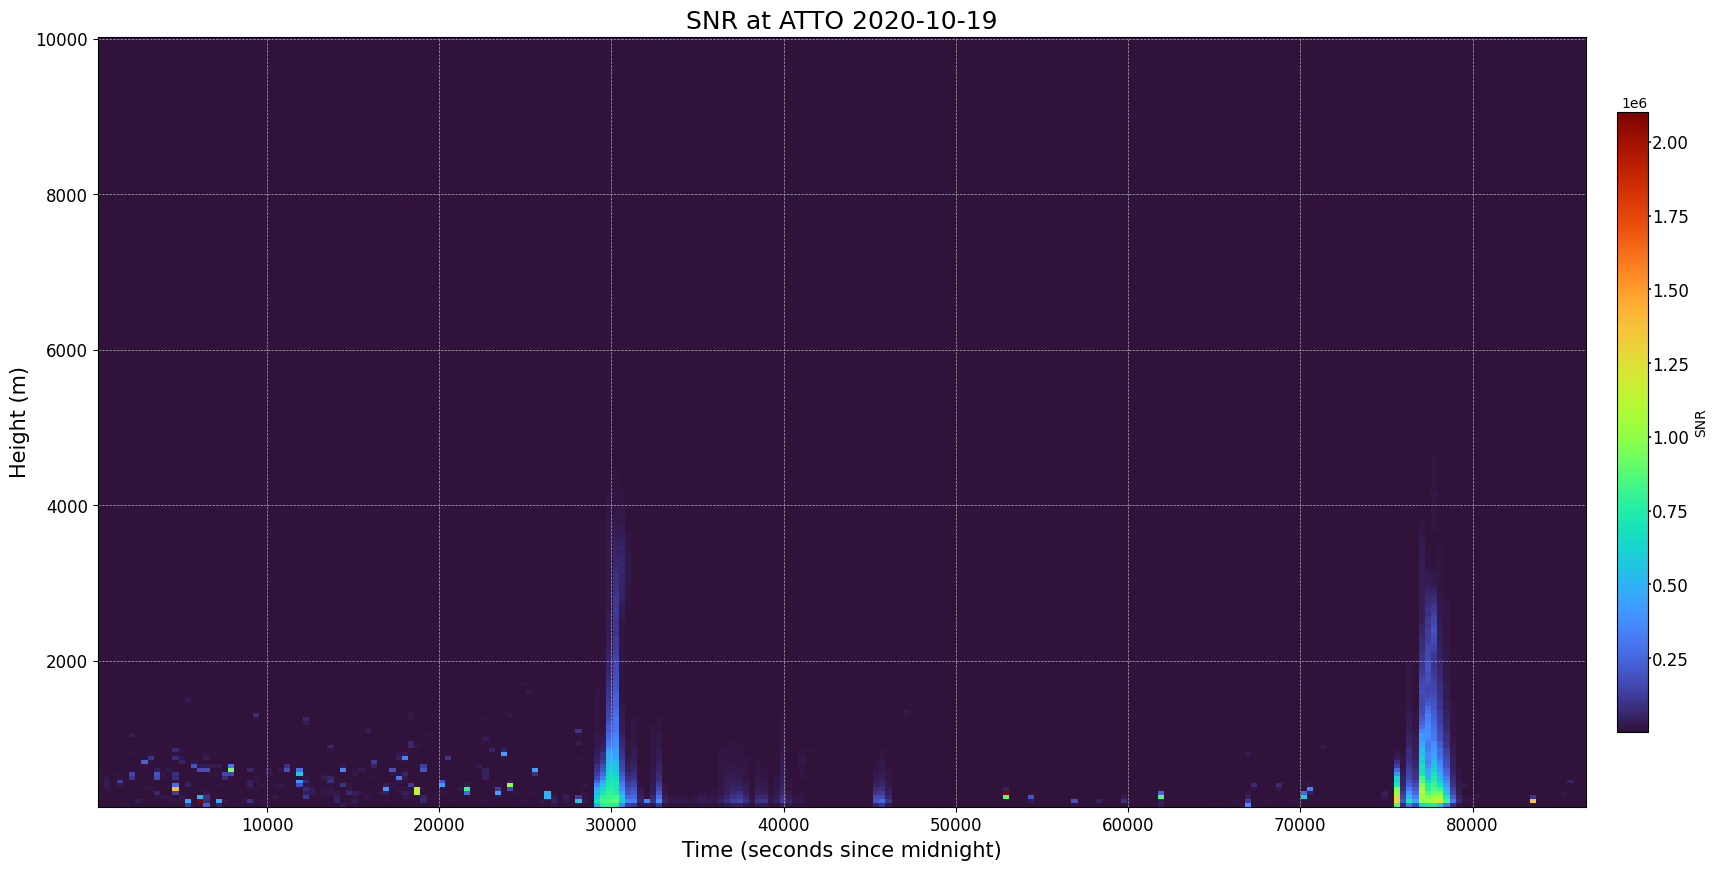

In [32]:
# Plot the vertical wind using pcolormesh
fig2, ax = plt.subplots(figsize=(20, 10))

# Define aspect ratio
aspectr = 0.5 * ((time[-1] - time[0]) / (height[-1] - height[0]))

# Plot with pcolormesh
pcm = ax.pcolormesh(time, height, SNR.T, cmap='turbo', shading='auto')

# Labels
ax.set_xlabel('Time (seconds since midnight)', fontsize=15)
ax.set_ylabel('Height (m)', fontsize=15)

# Add colorbar
cbar = plt.colorbar(pcm, ax=ax, pad=0.02, fraction=0.02)
cbar.set_label(label='SNR', size=10)

# Colorbar tick labels slightly larger
cbar.ax.tick_params(labelsize=12, length=2, width=1.1, pad=1)

# Add title
ax.set_title("SNR at ATTO 2020-10-19", fontsize=18)

# Add grid for better readability
ax.grid(True, linestyle='--', linewidth=0.5)

# Improve tick labels
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# Display the plot
plt.show()

In [33]:
#define Signal-to-Noise-Ratio (SNR)
#windW=ds_wind.variables['windW'][:]
#windW=ds_precipH.variables['windW'][:]
windW=ds_precipL.variables['windW'][:]

#print its content
print(windW) 

[[ 0.41  0.51  0.48 ... -0.65 -0.39  0.12]
 [ 0.08  0.07 -0.09 ... -0.26 -0.21 -0.51]
 [ 0.09 -0.15 -0.29 ...  0.61  0.05 -0.51]
 ...
 [-0.14 -0.25 -0.26 ... -1.16 -1.29 -1.28]
 [  nan   nan   nan ... -0.89 -0.86 -0.81]
 [  nan   nan   nan ... -0.84 -1.06 -1.08]]


In [34]:
print("Number of NaNs in windW:", np.isnan(windW).sum())
print("Indices with valid data:", np.where(~np.isnan(windW)))
print("WindW shape:", windW.shape) 

Number of NaNs in windW: 33722
Indices with valid data: (array([  0,   0,   0, ..., 239, 239, 239]), array([  0,   1,   2, ..., 195, 196, 197]))
WindW shape: (240, 198)


In [35]:
# Mask NaN values 
filt_windW = np.ma.masked_invalid(windW)

# Check new data
print(filt_windW)

[[0.4099999964237213 0.5099999904632568 0.47999998927116394 ...
  -0.6499999761581421 -0.38999998569488525 0.11999999731779099]
 [0.07999999821186066 0.07000000029802322 -0.09000000357627869 ...
  -0.25999999046325684 -0.20999999344348907 -0.5099999904632568]
 [0.09000000357627869 -0.15000000596046448 -0.28999999165534973 ...
  0.6100000143051147 0.05000000074505806 -0.5099999904632568]
 ...
 [-0.14000000059604645 -0.25 -0.25999999046325684 ... -1.159999966621399
  -1.2899999618530273 -1.2799999713897705]
 [-- -- -- ... -0.8899999856948853 -0.8600000143051147
  -0.8100000023841858]
 [-- -- -- ... -0.8399999737739563 -1.059999942779541 -1.0800000429153442]]


/tmp/ipykernel_9579/3075112605.py:3: RuntimeWarning: Mean of empty slice
  plt.plot(time, np.nanmean(windW, axis=1), marker="o", linestyle="-")


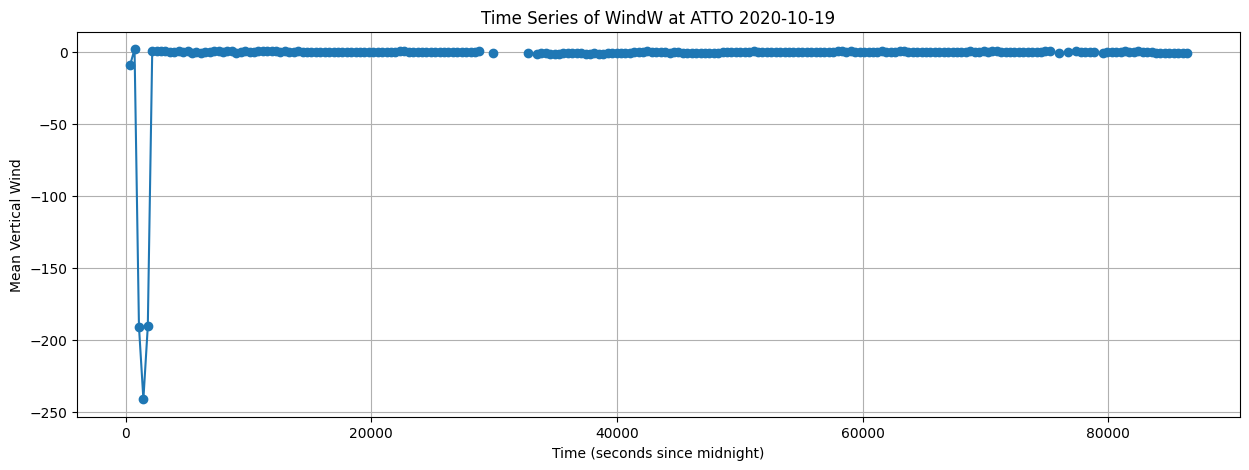

In [36]:
#timeseries
plt.figure(figsize=(15,5))
plt.plot(time, np.nanmean(windW, axis=1), marker="o", linestyle="-")
plt.xlabel("Time (seconds since midnight)")
plt.ylabel("Mean Vertical Wind")
plt.title("Time Series of WindW at ATTO 2020-10-19")
plt.grid()
plt.show()

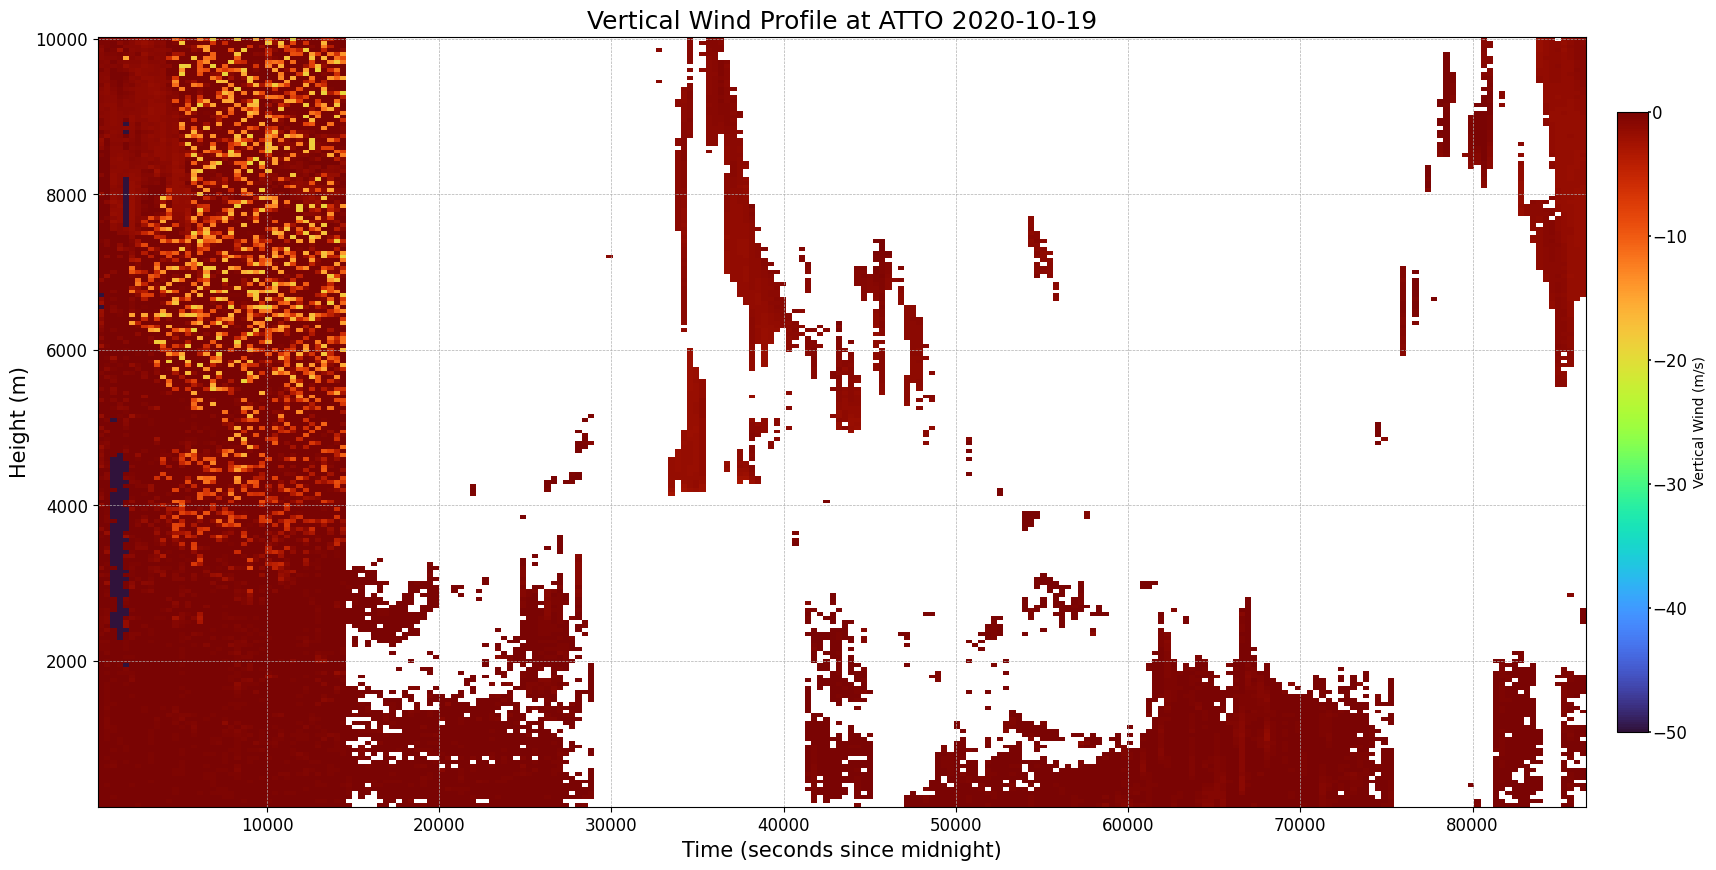

In [37]:
# Plot vertical wind using pcolormesh instead of imshow, because time steps didn't work with imshow
fig2, ax = plt.subplots(figsize=(20, 10))

# Define aspect ratio
aspectr = 0.5 * ((time[-1] - time[0]) / (height[-1] - height[0]))

# Plot with pcolormesh
pcm = ax.pcolormesh(time, height, filt_windW.T, cmap='turbo', shading='auto')
pcm.set_clim(-50, 0)  
# Labels
ax.set_xlabel('Time (seconds since midnight)', fontsize=15)
ax.set_ylabel('Height (m)', fontsize=15)

# Add colorbar
cbar = plt.colorbar(pcm, ax=ax, pad=0.02, fraction=0.02)
cbar.set_label(label='Vertical Wind (m/s)', size=10)

# Colorbar tick labels slightly larger
cbar.ax.tick_params(labelsize=12, length=2, width=1.1, pad=1)

# Add title
ax.set_title("Vertical Wind Profile at ATTO 2020-10-19", fontsize=18)

# Add grid 
ax.grid(True, linestyle='--', linewidth=0.5)

# Improve tick labels
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

plt.show()

In [38]:
# Define new varibale 'precipW'

#precipW=ds_wind.variables['precipW'][:]
#precipW=ds_precipH.variables['precipW'][:]
precipW=ds_precipL.variables['precipW'][:]

#print its content
print(precipW) 

[[  -5.531 -999.      -4.779 ...   -3.828   -3.819   -2.985]
 [-999.    -999.    -999.    ... -999.    -999.    -999.   ]
 [  -4.721  -10.297 -999.    ... -999.    -999.    -999.   ]
 ...
 [     nan      nan      nan ...      nan      nan      nan]
 [     nan      nan      nan ...      nan      nan      nan]
 [     nan      nan      nan ...      nan      nan      nan]]


In [40]:
# Mask NaN values 
filt_precipW = np.ma.masked_invalid(precipW)

# Check new data
print(filt_precipW)

[[-5.531000137329102 -999.0 -4.7789998054504395 ... -3.828000068664551
  -3.819000005722046 -2.984999895095825]
 [-999.0 -999.0 -999.0 ... -999.0 -999.0 -999.0]
 [-4.7210001945495605 -10.29699993133545 -999.0 ... -999.0 -999.0 -999.0]
 ...
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]]


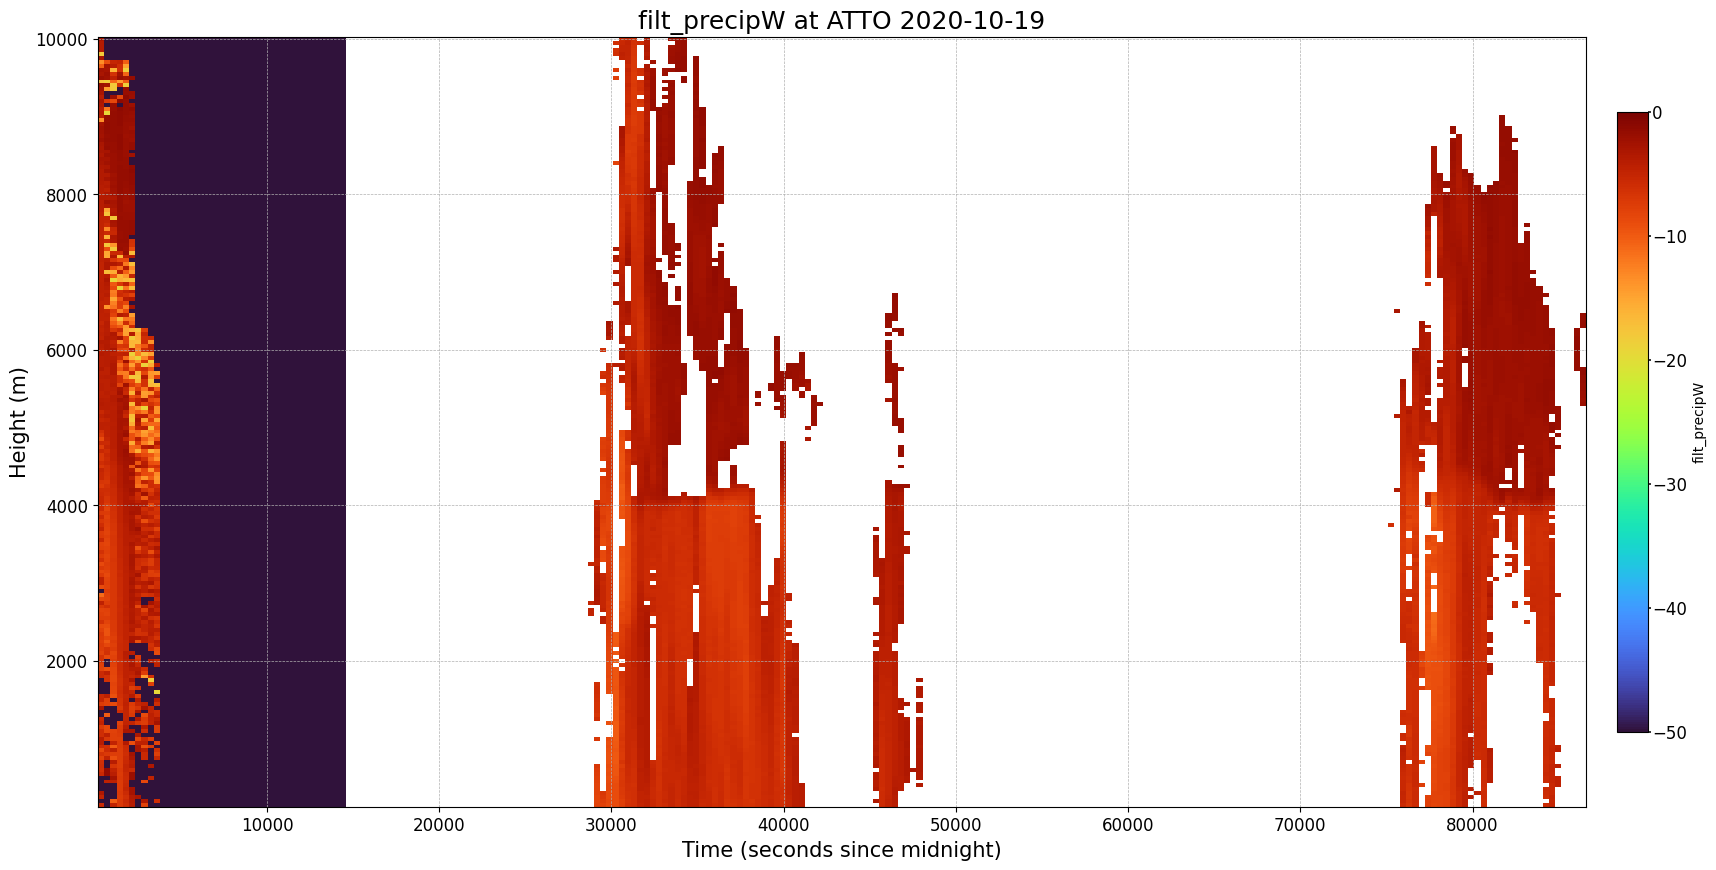

In [41]:
# Plot vertical wind using pcolormesh instead of imshow, because time steps didn't work with imshow
fig2, ax = plt.subplots(figsize=(20, 10))

# Define aspect ratio
aspectr = 0.5 * ((time[-1] - time[0]) / (height[-1] - height[0]))

# Plot with pcolormesh
pcm = ax.pcolormesh(time, height, filt_precipW.T, cmap='turbo', shading='auto')
pcm.set_clim(-50, 0)  
# Labels
ax.set_xlabel('Time (seconds since midnight)', fontsize=15)
ax.set_ylabel('Height (m)', fontsize=15)

# Add colorbar
cbar = plt.colorbar(pcm, ax=ax, pad=0.02, fraction=0.02)
cbar.set_label(label='filt_precipW', size=10)

# Colorbar tick labels slightly larger
cbar.ax.tick_params(labelsize=12, length=2, width=1.1, pad=1)

# Add title
ax.set_title("filt_precipW at ATTO 2020-10-19", fontsize=18)

# Add grid 
ax.grid(True, linestyle='--', linewidth=0.5)

# Improve tick labels
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

plt.show()